In [61]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [62]:
# Check missing values 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [63]:
# Delete the rows or data points to handle missing values 
df.shape

(891, 15)

In [64]:
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [65]:
df.dropna().shape
## we will not do this if the amount of the missing values are large

(182, 15)

In [66]:
## We can drop collumns based on the use of the variable
## Here we delete all all variables whome has missing values
df_clean = df.dropna(axis=1)
df_clean.head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


## Imputetion missing values 
## 1- Mean value imputation

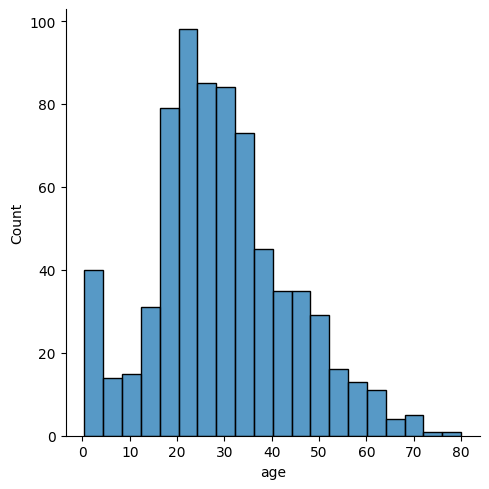

In [67]:
sns.displot(df['age'])

<Axes: xlabel='age', ylabel='Count'>

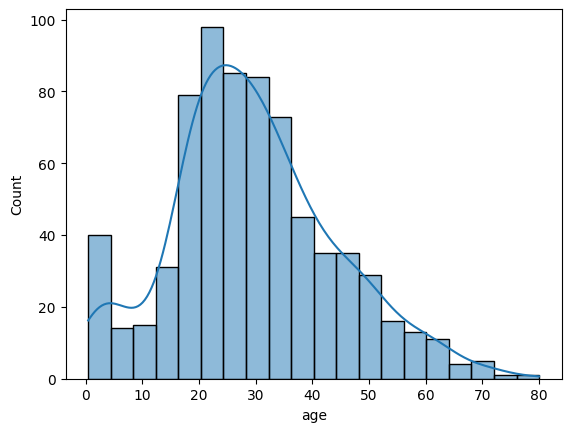

In [68]:
sns.histplot(df['age'],kde=True)

In [69]:
df['Age_Mean'] = df['age'].fillna(round(df['age'].mean(),2))

In [70]:
## Here we replace the nan values with mean value
## Mean imputetion works well when our data normally distributed 
df[["age", "Age_Mean"]].head(10)

,age,Age_Mean
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
5,NaN,29.7
6,54.0,54.0
7,2.0,2.0
8,27.0,27.0
9,14.0,14.0


In [71]:
## Median imputation - When our data is not normally distributed and the data has outliers 
df['Age_Median'] = df['age'].fillna(df['age'].median())
df[['age','Age_Mean','Age_Median']].head(10)

,age,Age_Mean,Age_Median
0,22.0,22.0,22.0
1,38.0,38.0,38.0
2,26.0,26.0,26.0
3,35.0,35.0,35.0
4,35.0,35.0,35.0
5,NaN,29.7,28.0
6,54.0,54.0,54.0
7,2.0,2.0,2.0
8,27.0,27.0,27.0
9,14.0,14.0,14.0


In [72]:
## Mode imputation Technqiue --- for categorical values 
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,Age_Median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [73]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [74]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()

In [75]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [76]:
df[['embarked_mode','embarked']].head(10)

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
5,Q,Q
6,S,S
7,S,S
8,S,S
9,C,C


In [77]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,Age_Median,embarked_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0,S


In [78]:
df.drop(columns=['age','embarked']).head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,Age_Median,embarked_mode
0,0,3,male,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,22.0,22.0,S
1,1,1,female,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,C
2,1,3,female,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,S
3,1,1,female,1,0,53.1000,First,woman,False,C,Southampton,yes,False,35.0,35.0,S
4,0,3,male,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,35.0,35.0,S


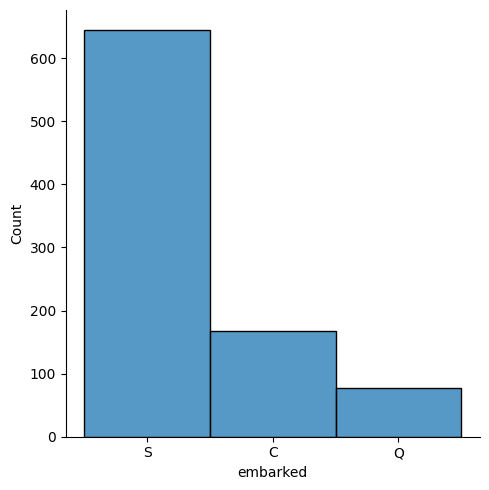

In [79]:
sns.displot(df['embarked'])

<Axes: xlabel='embarked_mode', ylabel='Count'>

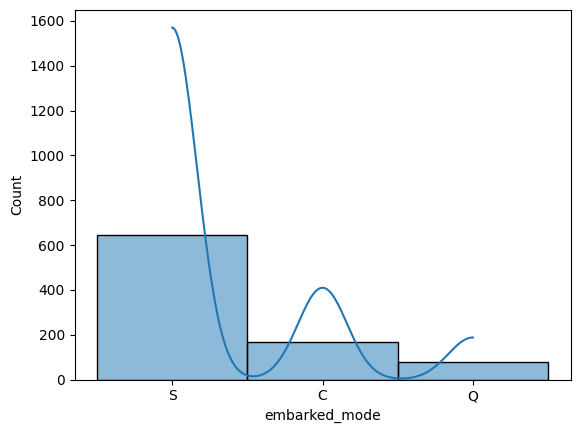

In [80]:
sns.histplot(df['embarked_mode'],kde=True)